#### Overview

Part 1: Basic text analysis

Part 2: Cleaning and normalization

Ideas for complex/advanced applications

### Part 1: Basic Text Analysis 

NLTK (Natural Language Toolkit): 

A python library with functions specifically designed to analyze natural (not-computer) language.

NLTK needs to be imported in any python script that uses it


In [1]:
import nltk
from urllib.request import urlopen


NLTK comes with two built-in texts, *Moby Dick* and *Sense and Sensibility.* Note the assumptions about how NLTK will be used: novels, long, canonical...

#### **NLTK functions: Concordance()**

- Called on a Text object and takes a string (a sequence of characters) as an argument

- text_variable.condordance(string_arg) 

- Calling condordance("word") returns the words that surround “word” in different sentences, helping us to get a glimpse of the contexts in which the word shows up. For example:

In [ ]:
#open = ('ca-dhri/Day2/ThingsFallApart.txt')

#file = urlopen(my_url)
#achebe_raw = file.read()
#achebe_txt = achebe_raw.decode()
#txt_tokens = nltk.word_tokenize(achebe_txt)
#achebe = nltk.Text(txt_tokens)

#let's make sure we created a text object
achebe

In [15]:
my_file = open("/home/jovyan/ca-dhri/Day2/ThingsFallApart.txt", "r")
file_txt = my_file.read()
txt_tokens = nltk.word_tokenize(file_txt)
txt_prepped = nltk.Text(txt_tokens)

txt_prepped


<Text: Things Fall Apart ( 1962 ) Achebe ,...>

In [ ]:
#file = open("ca-dhri/Day2/arrow.txt”, 'r')

#achebe = achebe.read()  
#achebe_raw = file.read()
#achebe_txt = achebe_raw.decode()
#txt_tokens = nltk.word_tokenize(achebe_txt)
#achebe = nltk.Text(txt_tokens)

In [16]:
#call concordance on the word "Mask"
txt_prepped.concordance("dance")

Displaying 8 of 8 matches:
his court in splendour and the sands dance for ever . [ Page 31 ] CHAPTER FIVE 
e and faded with the wind—a peaceful dance from a distant clan . “ It is an ozo
from a distant clan . “ It is an ozo dance , ” the men said among themselves . 
into silence again , and the elusive dance rose and fell with the wind . Somewh
irls came from the inner compound to dance . At first the bride was not among t
e cock to the musicians and began to dance . Her brass anklets rattled as she d
ancient men appeared in the crowd to dance unsteadily the funeral steps of the 
heir secret enclosure to learn a new dance to be displayed later to the village




#### **NLTK functions: Similar()**

-text.similar(string_arg)

-Like concordance, similar will find the contexts of the string variable it is given, but it can also compare the content of these contexts to all other words, looking for words that are used in similar contexts to the given argument

In [8]:
txt_prepped.similar("dance")

umuofia him see return me pay gather whistle market call rain live let
help plait marry argue buy sway send


#### **NLTK functions: dispersion plot**

-text.dispersion_plot(list_arg)

-Takes a list of strings as input (not a single string!) and outputs a graph of the instances where each word appears. If you want to make a plot for one string, pass the function a one-object list [“example”]

-Note: dispersion_plot() is helpful for seeing how language changes over time or over narrative arcs. It might be more useful on a large collection of newspapers over time than on a single newspaper.


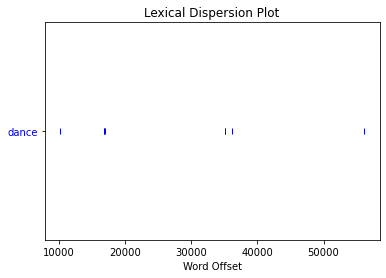

In [9]:
txt_prepped.dispersion_plot(["dance"])

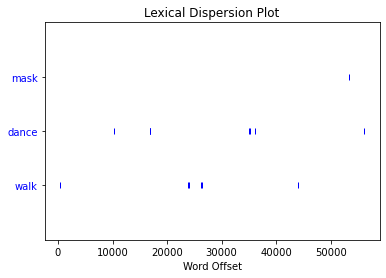

In [10]:
txt_prepped.dispersion_plot(["mask","dance","walk"])

#### **NLTK functions: count()**

-Takes a word as an argument and returns a count of each instance of that word in a text. 

-It is case sensitive (we will address cases in data cleaning)

In [11]:
txt_prepped.count("dance")

8

In [12]:
txt_prepped.count("see")

60

### Practice in Breakout Rooms

Can you think of how we could generate a concordance that would allow us to extract addresses from the text? What might we do with that information?

#### **Python operations on NLTK objects: len(), set()**

So far, we have been using the built-in NLTK corpus to analyze our text object. We can also use regular python expressions on it:

**len(text_object)** returns the length of the nltk object, that is, the number of words in the text. In a pre-cleaning text, this will include punctuation and metadata. 

**set(text_object)** creates a set (a list without duplicates) of all the unique words 

**len(set(text_object)** returns — you guessed it — the length of the set of unique words, ie, the number of unique words in the text.

In [13]:
len(txt_prepped)

59812

In [14]:
set(txt_prepped)
sorted(set(txt_prepped))[:30]

['!',
 "'",
 "'s",
 '(',
 ')',
 ',',
 '.',
 '...',
 '/',
 '//www.proquest.com/books/things-fall-apart-1962/docview/2138594716/se2',
 '0435909886',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115']

In [14]:
len(set(txt_prepped))

7685

### Part 2: Cleaning and Normalizing Data

#### **Removing capitalization and punctuation**

Type vs. token: 
- angeles vs. Angeles vs. ANGELES are distinct types
    
- A token is an instance of a type

- nltk.count(“angeles”) counts the number of tokens of that type

If the distinction between cases isn't important in your analysis, making all values of a text lowercase can be useful.

So we'll start normalizing the text by making all words lower case

In [15]:
txt_prepped_lowercase = [word.lower() for word in txt_prepped] 

In [16]:
txt_prepped_lowercase.count("see")

154

#### **Remove all punctuation**

Lets run this: 

In [18]:
txt_prepped_lowercase_textonly = [word.lower() for word in txt_prepped if word.isalpha()]

In [ ]:
#What did we just do, though?
#liberator_lowercase_textonly = [word.lower() for word in liberator if word.isalpha()] is shorthand for this function

liberator_lowercase_textonly = []				#define an empty list called liberator_lowercase_only

for w in liberator:					        #For each word ("w") in our existing text object 

	if w.isalpha():				        #if the word (“w”) is letters (not punctuation)
        
		liberator_lowercase_textonly.append(w.lower())  	#make it lowercase and add to our new list

        #if the word is not alpha, the for loop will move on to the next word 


TIP: be smart about your variable names 

#### **Removing stop words**

- ("the," "an," "a," etc.)


In [19]:
#a predefined list of stopwords, how nice!
nltk.download('stopwords')
from nltk.corpus import stopwords

#note, stopwords' type isn't a List, it's a WordListCorpusReader
print(type(stopwords))

#if we want a "real" list, we need to call the words attribute
print(type(stopwords.words()))
      
#here's what we have:
print(stopwords.words('english'))

<class 'nltk.corpus.util.LazyCorpusLoader'>
<class 'list'>
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#Get rid of stopwords in our text

#make sure you import stopwords somewhere in the script before you call it
txt_prepped_sans_stops = []
stops = stopwords.words('english')

#define a new list
for word in txt_prepped_lowercase_textonly:				#for each word in our cleaner list,
    if word not in stops:	                        #if that word isn’t in the list of stopwords,
        txt_prepped_sans_stops.append(word)		        #add it to our new list


In [21]:
#did it work?
txt_prepped_sans_stops.count("mask")

46

In [22]:
txt_prepped_sans_stops.count("of")

0

In [23]:
txt_prepped_sans_stops.count("after")

0

#### **Lemmatizing words**

- Lemmatization shrinks words to their grammatical root
    - example, cats ⭢ cat and walked ⭢ walk
  
- This gets complicated in the case of men ⭢ man and sang ⭢ sing 

- Lemmatization looks up a word in a reference dictionary and finds the appropriate root (though this still is not entirely accurate and takes a long time, since each word must be looked up in a reference)

- NLTK comes with pre-built stemmers and lemmatizers. 

In [24]:
from nltk.stem import WordNetLemmatizer	

#create an instance of it for our function
wordnet_lemmatizer = WordNetLemmatizer()	

print(wordnet_lemmatizer.lemmatize("children"))

print(wordnet_lemmatizer.lemmatize("better"))

#for a word like “better,” need to specify grammatical function
print(wordnet_lemmatizer.lemmatize("better", pos='a'))
print(wordnet_lemmatizer.lemmatize("better", pos='n'))

#Parts of Speech
#ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v"

txt_prepped_lemma = []
for word in txt_prepped_sans_stops:
    word_lem = wordnet_lemmatizer.lemmatize(word)
    txt_prepped_lemma.append(word_lem)   

child
better
good
better


### Part 3: Basic text analysis with our clean text

Because we've lemmatized our text, the results of functions like concordance, similar, and count will change. 

In [25]:
#we have to make our clean text an NLTK object to use the functions
txt_prepped_clean = nltk.Text(txt_prepped_lemma)

txt_prepped_clean.concordance('world')

Displaying 24 of 24 matches:
ar tell truth knew hated hear augury world ruin voice woman returning stream br
ften said dead father umuaro looking world must utterly bewildered way new age 
unded town protected ezeulu saw ruin world day five year ago leader umuaro deci
 man medicine old woman market swept world broom even land white men say sun ne
ews chukwu high god remove foot hold world must know eke okperi break page thre
led village village thrown every man world decided must go wrestle land spirit 
r okperi think ulu fight blame today world spoilt longer head tail anything don
roughout day sun breathed fire usual world lain prostrate shock bird sang morni
 sharp dry bark thunder broke tumult world dozed page month full life smelling 
 made briton organizer page engineer world new old land great reward honourable
ever heard father speak anyone equal world changing told like like bird friend 
come back something bring home share world like mask dancing want see well stan
 shall beco

In [26]:
txt_prepped_clean.concordance("dance")

Displaying 13 of 13 matches:
ppears market place broom right hand dance round vast open space beckoning broo
ce whatever music beat drum somebody dance oduche reluctance left father talked
dant making great plan coming learnt dance anxious mask edogo carving carver um
houted back old woman never old come dance crowd laughed ikolo fashioned olden 
made proverb said see old woman stop dance point direction sure somewhere somet
ay compound great man always someone dance salute page chapter ten although ton
nest man know thing beat drum ezeulu dance see tomorrow tell umuaro come death 
mate came umunneora okperi learn new dance done many year dry season harvest gr
e sent learn new thing tell man must dance dance prevalent scratched head conti
 learn new thing tell man must dance dance prevalent scratched head continued r
like groan much song agaba mask song dance stood power aggressiveness youth con
ke sane man reminded saying man must dance dance prevailing time told accept wi
e man remin

In [27]:
txt_prepped_clean.concordance("mask")

Displaying 25 of 52 matches:
cried hem salute like salute enraged mask adult house left suffer pain parturi
ive sang idemili festival year great mask assumed important occasion mask call
reat mask assumed important occasion mask called ogalanya man rich every idemi
ighbour came ilo umunneora see great mask bedecked mirror rich cloth many colo
ror rich cloth many colour page year mask spoke monologue full boast knew lang
omething bring home share world like mask dancing want see well stand one plac
son edogo left home early day finish mask carving new ancestral spirit five da
pected return depth earth appear men mask would act attendant making great pla
eat plan coming learnt dance anxious mask edogo carving carver umuaro besides 
ed long ago working moment hand free mask different could home profane gaze wo
wo market place one initiated secret mask would dare approach hut faced forest
s found atmosphere hut right carving mask around older mask regalia ancestral 
 hut right carving mask

In [28]:
txt_prepped_clean.concordance("place")

Displaying 25 of 90 matches:
kposi wiped mouth back hand returned place every time prayed umuaro bitterness 
e umuachala umunneora soon mentioned place ezeulu known happened saw knew spiri
lth find favour people sometimes see place kind weather perhaps returning home 
stand seen day came home marry woman place way say marry daughter like men agre
made called ulu half medicine buried place became nkwo market half thrown strea
e wanderer told three four different place sojourned moved driven away umuofia 
bly heard clearly corner nkwo market place men umuaro responded great effort lo
ng motherland fight sending akukalia place choice war peace speak umuaro gave p
d woman every eke day appears market place broom right hand dance round vast op
d spear grass remember coming father place cut grass thatch said akukalia thing
ed bull must wait return umuaro told place perhaps deliberate perhaps accidenta
an done unforgivable thing let u put place man made corpse eye said would bear 
blowing cru

In [29]:
txt_prepped_clean.concordance("see")

Displaying 25 of 162 matches:
e bring good asked ugoye younger wife see blind see beyond top ukwa tree follow
od asked ugoye younger wife see blind see beyond top ukwa tree follow oho see m
d see beyond top ukwa tree follow oho see moon may face meeting mine bring good
y edogo reply ezeulu looked direction see clearly part obi darkness edogo part 
think tell difference face deity face see may go son like may carve god umuaro 
rth punctuate prayer ulu thank making see another new moon may see may househol
thank making see another new moon may see may household healthy prosperous moon
ing stream broke ezeulu thought could see darkness outside new moon shown retir
 today said ezeulu time one day would see eru said nwafo referring apparition o
king worse son keep quiet said ezeulu see obika cooled little obika began tell 
e wealth find favour people sometimes see place kind weather perhaps returning 
money buy ivory bracelet ezeulu never see anything wrong know ojiugo looking to
separated 

In [31]:
txt_prepped_clean.concordance("stand")

Displaying 20 of 20 matches:
d enemy yes say take away man umuaro stand say dare woman bear man say yet rebu
ss son sometimes better coward often stand compound coward point ruin brave man
riously wrong called daughter akueke stand seen day came home marry woman place
lying ant swarmed around tilley lamp stand far corner soon lost wing crawled fl
id obika tried take spear would hear stand aside told think fighting inside two
orld like mask dancing want see well stand one place spirit tell befriend white
t asked rate shall find nowhere even stand market came hut carrying bunch pumpk
bush could give father second burial stand pas shit mouth enough come abuse dis
sks u proceed previous policy anyone stand frustrating said clarke know thinkin
se go war okperi piece land belong u stand page tell umuaro would happen right 
d traveller distant place make enemy stand true said akuebue wondering best lea
ication concealed satisfaction taken stand matter want appear eager others supp
aving akueb

In [30]:
txt_prepped_clean.similar("stand")

always ask nkwo give thought quarrel confused prepared


In [ ]:
liberator_clean.similar("child")

In [ ]:
liberator_clean.dispersion_plot(["law","america","anarchist","assassin",])

In [ ]:
liberator.dispersion_plot(["law","America","anarchist","assassin",])